# Part I - (Ford GoBike Trip Data Analysis)
## by (Eugene Masinde)
This is a section 2 final project by Eugene Masinde, a prospective Data Analyst working for Kaimosi Friends University in Vihiga county. It is done as part of the ALX/UDACITY Nano Degree in Data Analytics. You can reach me through any of the following:

<ul>
<li>Linkedin: https://www.linkedin.com/in/eugene-masinde-095bb343/</li>
<li>Email: odanga.masinde@gmail.com</li>
<li>Phone: +254727172822</li>
<li>Github: https://github.com/boygj</li>
</ul>

## Introduction
This data set is taken from https://www.fordgobike.com/system-data and represents trips taken by members of the service for month of February of 2019. Data consists of info about trips taken by service's members, their types, their age, their gender, stations of starting and ending trips, duration of trips etc.



## Preliminary Wrangling


In [63]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
go_df= pd.read_csv('201902-fordgobike-tripdata.csv')
go_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


## Assessing Data

After selecting and importing the data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in the "Accessing Data" section in the wrangle_act.ipynb Jupyter Notebook.

In [11]:
#Lets get a random sample of this data
go_df.sample(8)



,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
181291,382,2019-02-01 09:19:37.5720,2019-02-01 09:25:59.5780,58.0,Market St at 10th St,37.776619,-122.417385,19.0,Post St at Kearny St,37.788975,-122.403452,4814,Subscriber,1993.0,Male,No
121245,993,2019-02-11 15:39:30.1300,2019-02-11 15:56:03.8190,361.0,Mendell St at Fairfax Ave,37.739853,-122.385655,127.0,Valencia St at 21st St,37.756708,-122.421025,5288,Subscriber,1971.0,Male,No
87131,263,2019-02-17 10:43:22.8670,2019-02-17 10:47:46.5910,76.0,McCoppin St at Valencia St,37.771662,-122.422423,58.0,Market St at 10th St,37.776619,-122.417385,5381,Subscriber,1994.0,Male,No
160486,156,2019-02-05 17:05:16.3320,2019-02-05 17:07:52.4290,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,202.0,Washington St at 8th St,37.800754,-122.274894,5172,Subscriber,1996.0,Female,No
111039,799,2019-02-12 17:22:53.3740,2019-02-12 17:36:13.2900,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,130.0,22nd St Caltrain Station,37.757288,-122.392051,4848,Subscriber,1985.0,Male,No
12196,810,2019-02-27 17:43:39.9450,2019-02-27 17:57:10.6460,338.0,13th St at Franklin St,37.803189,-122.270579,202.0,Washington St at 8th St,37.800754,-122.274894,2281,Subscriber,1990.0,Male,No
150798,249,2019-02-06 17:53:15.6140,2019-02-06 17:57:25.4500,275.0,Julian St at 6th St,37.342997,-121.888889,280.0,San Fernando St at 7th St,37.337122,-121.883215,3916,Subscriber,1984.0,Male,Yes
58949,174,2019-02-20 21:50:58.0560,2019-02-20 21:53:52.6560,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,4781,Subscriber,1996.0,Male,No


In [12]:
#Finding more information about our dataset
go_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
#Get data on the overall shape of the dataset
go_df.shape

(183412, 16)

In [8]:
#get summary statistics using describe()
go_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [17]:
#Check the number of values with the minimum duration which is 61 seconds

go_df[go_df.duration_sec ==61].count()

duration_sec               18
start_time                 18
end_time                   18
start_station_id           18
start_station_name         18
start_station_latitude     18
start_station_longitude    18
end_station_id             18
end_station_name           18
end_station_latitude       18
end_station_longitude      18
bike_id                    18
user_type                  18
member_birth_year          18
member_gender              18
bike_share_for_all_trip    18
dtype: int64

In [18]:
#Check for the 10 max durations to see if there are any outliers
go_df.nlargest(10, ['duration_sec'])

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
101361,85444,2019-02-13 17:59:55.1240,2019-02-14 17:43:59.9540,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,98.0,Valencia St at 16th St,37.765052,-122.421866,6168,Subscriber,NaN,NaN,No
85465,84548,2019-02-16 15:48:25.0290,2019-02-17 15:17:33.0800,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,-122.419622,6301,Subscriber,1981.0,Male,No
153705,83772,2019-02-05 12:44:54.2860,2019-02-06 12:01:06.6310,78.0,Folsom St at 9th St,37.773717,-122.411647,345.0,Hubbell St at 16th St,37.766483,-122.398279,3405,Customer,NaN,NaN,No
127999,83519,2019-02-09 15:16:17.5370,2019-02-10 14:28:17.2700,72.0,Page St at Scott St,37.772406,-122.435650,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5561,Customer,1990.0,Male,No
112435,83407,2019-02-11 16:25:33.0690,2019-02-12 15:35:40.9560,77.0,11th St at Natoma St,37.773507,-122.416040,344.0,16th St Depot,37.766349,-122.396292,1842,Customer,1988.0,Male,No
5203,83195,2019-02-27 14:47:23.1810,2019-02-28 13:53:58.4330,243.0,Bancroft Way at College Ave,37.869360,-122.254337,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,5781,Subscriber,1962.0,Female,Yes
95750,82512,2019-02-14 13:56:21.7280,2019-02-15 12:51:34.3150,368.0,Myrtle St at Polk St,37.785434,-122.419622,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,6152,Customer,1998.0,Other,No
173365,82385,2019-02-02 13:07:43.0360,2019-02-03 12:00:48.1750,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,-122.453704,2933,Customer,NaN,NaN,No
8631,81549,2019-02-27 09:41:38.5520,2019-02-28 08:20:48.3860,138.0,Jersey St at Church St,37.750900,-122.427411,140.0,Cesar Chavez St at Dolores St,37.747858,-122.424986,2266,Subscriber,1963.0,Female,No
176987,80891,2019-02-01 11:05:18.9760,2019-02-02 09:33:30.1690,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,55.0,Webster St at Grove St,37.777053,-122.429558,3133,Customer,NaN,NaN,No


In [19]:
go_df.duplicated().sum()

0

In [20]:
go_df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

#### Tidiness Issues
T1. Some columns are unnecessary for analysis
T2. Representation of time in seconds may give an unclear perspective of time

#### Quality Issues
Q1. There are missing records in member_birth_year, member_gender and bike_share_for_all_trip columns
Q2. bike_id has an incorrect datatype
Q3. There is no column for user age


<a id='cleaning'></a>
# Cleaning Data
 
 In the next step, we will be cleaning the data according to the issues that have been identified. First we must create copies of all of the original data.

In [29]:
#Create copies of the original data
clean_go=go_df.copy()

## Cleaning Tidiness Issues

### T1. Some columns are unnecessary for analysis

#### Define

Delete Unnecessary data from the dataset including start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude

#### Code

In [30]:
clean_go.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

#### Test

In [31]:
clean_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   end_station_id           183215 non-null  float64
 6   end_station_name         183215 non-null  object 
 7   bike_id                  183412 non-null  int64  
 8   user_type                183412 non-null  object 
 9   member_birth_year        175147 non-null  float64
 10  member_gender            175147 non-null  object 
 11  bike_share_for_all_trip  183412 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 16.8+ MB


### T2. Representation of time in seconds may give an unclear perspective of time

#### Define

Add columns with representations of this data in minutes, hours and days

#### Code

In [32]:
clean_go.insert(1, 'duration_minutes', clean_go.duration_sec/60)
clean_go.insert(2, 'duration_hours', clean_go.duration_sec/3600)
clean_go.insert(3, 'duration_days', clean_go.duration_hours/24)

#### Test

In [33]:
clean_go.head()

,duration_sec,duration_minutes,duration_hours,duration_days,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,869.750000,14.495833,0.603993,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
1,42521,708.683333,11.811389,0.492141,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,No
2,61854,1030.900000,17.181667,0.715903,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,608.166667,10.136111,0.422338,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,26.416667,0.440278,0.018345,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes


## Cleaning Quality Issues

### Q1. There are missing records in member_birth_year, member_gender and bike_share_for_all_trip columns

#### Define

Replace all missing data

#### Code

In [34]:
clean_go.isna().sum() 

duration_sec                  0
duration_minutes              0
duration_hours                0
duration_days                 0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
end_station_id              197
end_station_name            197
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [35]:
#We will use a forloop to fill in all missing data
for val in ["end_station_id", "start_station_id", "start_station_name", "end_station_name", "member_birth_year"]:
    clean_go[val] = clean_go[val].fillna(clean_go[val].mode()[0])

In [36]:
clean_go.isna().sum() 

duration_sec                  0
duration_minutes              0
duration_hours                0
duration_days                 0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
end_station_id                0
end_station_name              0
bike_id                       0
user_type                     0
member_birth_year             0
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [37]:
#First we check the existing male to female values. Considering that the gender values skew towards male figures
clean_go.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [38]:
#Lets fill dataframe with missing values

clean_go["member_gender"] = clean_go["member_gender"].fillna("Female")

#### Test

In [39]:
#There are no more missing values
clean_go.isna().sum() 

duration_sec               0
duration_minutes           0
duration_hours             0
duration_days              0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

## Cleaning Quality Issues

### Q2. bike_id, end_station_id and start_station_id has an incorrect datatype

#### Define

Change datatypes for bike_id, end_station_id and start_station_id

#### Code

In [42]:
clean_go[['bike_id', 'end_station_id', 'start_station_id']]= clean_go[['bike_id', 'end_station_id', 'start_station_id']].astype(str)

#### Test

In [43]:
clean_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   duration_minutes         183412 non-null  float64
 2   duration_hours           183412 non-null  float64
 3   duration_days            183412 non-null  float64
 4   start_time               183412 non-null  object 
 5   end_time                 183412 non-null  object 
 6   start_station_id         183412 non-null  object 
 7   start_station_name       183412 non-null  object 
 8   end_station_id           183412 non-null  object 
 9   end_station_name         183412 non-null  object 
 10  bike_id                  183412 non-null  object 
 11  user_type                183412 non-null  object 
 12  member_birth_year        183412 non-null  float64
 13  member_gender            183412 non-null  object 
 14  bike

## Cleaning Quality Issues

### Q3. There is no column for user age

#### Define

Create a column for age

#### Code

In [66]:
clean_go['age'] = 2019 - clean_go['member_birth_year']

#### Test

In [67]:
clean_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   duration_minutes         183412 non-null  float64
 2   duration_hours           183412 non-null  float64
 3   duration_days            183412 non-null  float64
 4   start_time               183412 non-null  object 
 5   end_time                 183412 non-null  object 
 6   start_station_id         183412 non-null  object 
 7   start_station_name       183412 non-null  object 
 8   end_station_id           183412 non-null  object 
 9   end_station_name         183412 non-null  object 
 10  bike_id                  183412 non-null  object 
 11  user_type                183412 non-null  object 
 12  member_birth_year        183412 non-null  float64
 13  member_gender            183412 non-null  object 
 14  bike

In [68]:
#Change age to int64 datatype for easy representation
clean_go.age=clean_go.age.astype('int64')

#### Test

In [69]:
clean_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   duration_minutes         183412 non-null  float64
 2   duration_hours           183412 non-null  float64
 3   duration_days            183412 non-null  float64
 4   start_time               183412 non-null  object 
 5   end_time                 183412 non-null  object 
 6   start_station_id         183412 non-null  object 
 7   start_station_name       183412 non-null  object 
 8   end_station_id           183412 non-null  object 
 9   end_station_name         183412 non-null  object 
 10  bike_id                  183412 non-null  object 
 11  user_type                183412 non-null  object 
 12  member_birth_year        183412 non-null  float64
 13  member_gender            183412 non-null  object 
 14  bike

In [77]:
#Check average user data for age
df_go.age.describe()

count    183412.000000
mean         34.049653
std           9.908290
min          18.000000
25%          27.000000
50%          31.000000
75%          38.000000
max         141.000000
Name: age, dtype: float64

There are appears to be outliers in the age data, so remove outliers

In [86]:
#Check 10 largest figures in age
clean_go.nlargest(79, ['age'])

,duration_sec,duration_minutes,duration_hours,duration_days,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
27370,1474,24.566667,0.409444,0.017060,2019-02-25 09:28:42.1610,2019-02-25 09:53:17.0680,15.0,San Francisco Ferry Building (Harry Bridges Pl...,386.0,24th St at Bartlett St,6436,Customer,1878.0,Female,No,141
1285,148,2.466667,0.041111,0.001713,2019-02-28 19:29:17.6270,2019-02-28 19:31:45.9670,158.0,Shattuck Ave at Telegraph Ave,173.0,Shattuck Ave at 55th St,5391,Subscriber,1900.0,Male,Yes,119
10827,1315,21.916667,0.365278,0.015220,2019-02-27 19:21:34.4360,2019-02-27 19:43:30.0080,343.0,Bryant St at 2nd St,375.0,Grove St at Masonic Ave,6249,Subscriber,1900.0,Male,No,119
16087,1131,18.850000,0.314167,0.013090,2019-02-27 08:37:36.8640,2019-02-27 08:56:28.0220,375.0,Grove St at Masonic Ave,36.0,Folsom St at 3rd St,4968,Subscriber,1900.0,Male,No,119
19375,641,10.683333,0.178056,0.007419,2019-02-26 17:03:19.8550,2019-02-26 17:14:01.6190,9.0,Broadway at Battery St,30.0,San Francisco Caltrain (Townsend St at 4th St),6164,Customer,1900.0,Male,No,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43259,676,11.266667,0.187778,0.007824,2019-02-22 16:44:42.7780,2019-02-22 16:55:59.3870,21.0,Montgomery St BART Station (Market St at 2nd St),67.0,San Francisco Caltrain Station 2 (Townsend St...,5545,Subscriber,1920.0,Male,No,99
183388,490,8.166667,0.136111,0.005671,2019-02-01 00:39:53.1120,2019-02-01 00:48:03.3380,61.0,Howard St at 8th St,81.0,Berry St at 4th St,5411,Subscriber,1927.0,Male,No,92
35746,568,9.466667,0.157778,0.006574,2019-02-23 17:46:46.1630,2019-02-23 17:56:14.9750,85.0,Church St at Duboce Ave,100.0,Bryant St at 15th St,6294,Customer,1928.0,Other,No,91
92647,829,13.816667,0.230278,0.009595,2019-02-15 18:29:33.1320,2019-02-15 18:43:22.5250,90.0,Townsend St at 7th St,109.0,17th St at Valencia St,3594,Customer,1930.0,Other,No,89


In [98]:
clean_go.drop(clean_go[clean_go['age']>90].index, inplace=True)
clean_go.head()

,duration_sec,duration_minutes,duration_hours,duration_days,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,869.750000,14.495833,0.603993,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,35
1,42521,708.683333,11.811389,0.492141,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,1988.0,Female,No,31
2,61854,1030.900000,17.181667,0.715903,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,47
3,36490,608.166667,10.136111,0.422338,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,30
4,1585,26.416667,0.440278,0.018345,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,45


In [99]:
#Check for outliers
clean_go.nlargest(10, ['age'])

,duration_sec,duration_minutes,duration_hours,duration_days,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
92647,829,13.816667,0.230278,0.009595,2019-02-15 18:29:33.1320,2019-02-15 18:43:22.5250,90.0,Townsend St at 7th St,109.0,17th St at Valencia St,3594,Customer,1930.0,Other,No,89
5197,217,3.616667,0.060278,0.002512,2019-02-28 13:51:46.2380,2019-02-28 13:55:24.1270,70.0,Central Ave at Fell St,71.0,Broderick St at Oak St,5801,Subscriber,1931.0,Male,No,88
5266,384,6.400000,0.106667,0.004444,2019-02-28 13:35:05.4280,2019-02-28 13:41:30.2230,84.0,Duboce Park,71.0,Broderick St at Oak St,6608,Subscriber,1931.0,Male,No,88
5447,147,2.450000,0.040833,0.001701,2019-02-28 13:08:56.9350,2019-02-28 13:11:24.0620,84.0,Duboce Park,72.0,Page St at Scott St,5018,Subscriber,1931.0,Male,No,88
26488,334,5.566667,0.092778,0.003866,2019-02-25 12:13:25.3300,2019-02-25 12:18:59.4340,71.0,Broderick St at Oak St,84.0,Duboce Park,3361,Subscriber,1931.0,Male,No,88
26535,119,1.983333,0.033056,0.001377,2019-02-25 12:08:38.3110,2019-02-25 12:10:37.6600,71.0,Broderick St at Oak St,53.0,Grove St at Divisadero,6475,Subscriber,1931.0,Male,No,88
26568,135,2.250000,0.037500,0.001562,2019-02-25 12:02:18.3600,2019-02-25 12:04:34.2720,71.0,Broderick St at Oak St,53.0,Grove St at Divisadero,6257,Subscriber,1931.0,Male,No,88
26604,294,4.900000,0.081667,0.003403,2019-02-25 11:52:12.5370,2019-02-25 11:57:06.9850,85.0,Church St at Duboce Ave,53.0,Grove St at Divisadero,5814,Subscriber,1931.0,Male,No,88
26641,78,1.300000,0.021667,0.000903,2019-02-25 11:50:14.7770,2019-02-25 11:51:33.5550,85.0,Church St at Duboce Ave,85.0,Church St at Duboce Ave,4361,Subscriber,1931.0,Male,No,88
26685,110,1.833333,0.030556,0.001273,2019-02-25 11:40:27.3480,2019-02-25 11:42:17.7820,85.0,Church St at Duboce Ave,73.0,Pierce St at Haight St,6208,Subscriber,1931.0,Male,No,88


<a id='storing'></a>
# Storing Data

In this section, we will be saving the edited dataframe as a csv file

In [100]:
clean_go.to_csv('clean_ford_data.csv', index=False)


### What is the structure of your dataset?

The datatset contains 183,412 entries and 16 variables. Datatypes available in this dataset are Int64, float64 and Object

### What is/are the main feature(s) of interest in your dataset?

The main features for investigation in this dataset are member Gender, member birth year, duration in hours, minutes and days

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

member_gender 
member_birth_year 
duration_days 
user_type
bike_share_for_all_trip

<a id='analysis'></a>
# Data Analysis and Visualization
In this section, we will be performing data analysis and vizualization on the final data frame that was cleaned in the above steps

## 1. Exploratory Data Analysis

### A. Univariate Exploration

In [101]:
#Import the cleaned and stored csv file
df_go= pd.read_csv('clean_ford_data.csv')
df_go.head()

,duration_sec,duration_minutes,duration_hours,duration_days,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,869.750000,14.495833,0.603993,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,35
1,42521,708.683333,11.811389,0.492141,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,1988.0,Female,No,31
2,61854,1030.900000,17.181667,0.715903,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,47
3,36490,608.166667,10.136111,0.422338,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,30
4,1585,26.416667,0.440278,0.018345,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,45


In [102]:
df_go.describe()

,duration_sec,duration_minutes,duration_hours,duration_days,start_station_id,end_station_id,bike_id,member_birth_year,age
count,183335.000000,183335.000000,183335.000000,183335.000000,183335.000000,183335.000000,183335.000000,183335.000000,183335.000000
mean,726.111806,12.101863,0.201698,0.008404,138.483639,136.174724,4472.836223,1984.985311,34.014689
std,1794.741340,29.912356,0.498539,0.020772,111.738867,111.476510,1664.406163,9.761477,9.761477
min,61.000000,1.016667,0.016944,0.000706,3.000000,3.000000,11.000000,1930.000000,18.000000
25%,325.000000,5.416667,0.090278,0.003762,47.000000,44.000000,3777.000000,1981.000000,27.000000
50%,514.000000,8.566667,0.142778,0.005949,104.000000,100.000000,4957.000000,1988.000000,31.000000
75%,796.000000,13.266667,0.221111,0.009213,239.000000,235.000000,5502.000000,1992.000000,38.000000
max,85444.000000,1424.066667,23.734444,0.988935,398.000000,398.000000,6645.000000,2001.000000,89.000000


### 1. What is the average duration of a bike ride in minutes from the data?

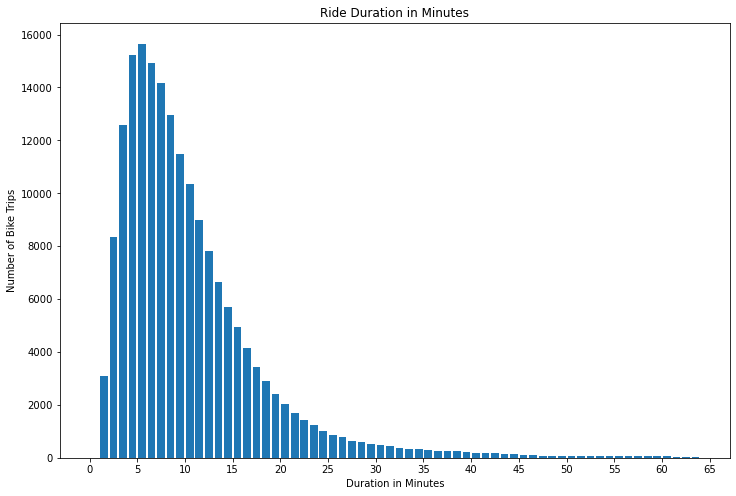

In [103]:
#Duration of rides in minutes plot
plt.figure(figsize=[12, 8])
bin_edges=np.arange(0, 65, 1)
ticks= [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
label=['{}'.format(val) for val in ticks]
plt.hist(data=df_go, x='duration_minutes', bins=bin_edges, rwidth=0.8)
plt.title('Ride Duration in Minutes')
plt.xlabel('Duration in Minutes')
plt.ylabel('Number of Bike Trips')
plt.xticks(ticks, label)
plt.show()


From the above plot, we can conclude that the average bike ride time is betweek 3 minutes and 15 minutes long

### 2. Which user type is uses bike rides the most?

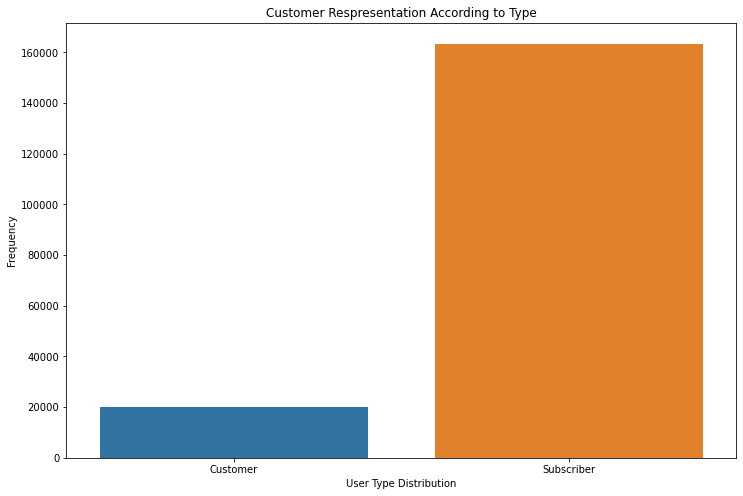

In [117]:
#Distribution of user types from the data
plt.figure(figsize=[12, 8])

plot = sns.countplot(data=df_go, x='user_type')

plt.title('Customer Respresentation According to Type')
plt.xlabel('User Type Distribution')
plt.ylabel('Frequency')

plt.show()

From the above CountPlot, we can see that that a large proportion of riders are subscribers while a lower number are classified as customers

### 3. What is the User Age Distrubution

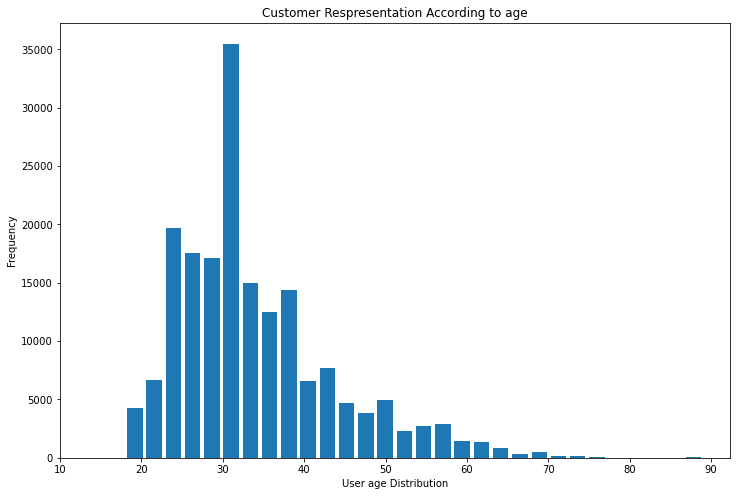

In [116]:
#Distribution of user age from data
plt.figure(figsize=[12, 8])
ticks= [10, 20, 30, 40, 50, 60, 70, 80, 90]
label=['{}'.format(val) for val in ticks]
plt.hist(data=df_go, x='age', bins=30, rwidth=0.8)

plt.title('Customer Respresentation According to age')
plt.xlabel('User age Distribution')
plt.ylabel('Frequency')

plt.xticks(ticks, label)
plt.show()

From the distrubution we can see that the majority of users range between the ages of 23 and 40

### 4. What is the User Gender Distrubution

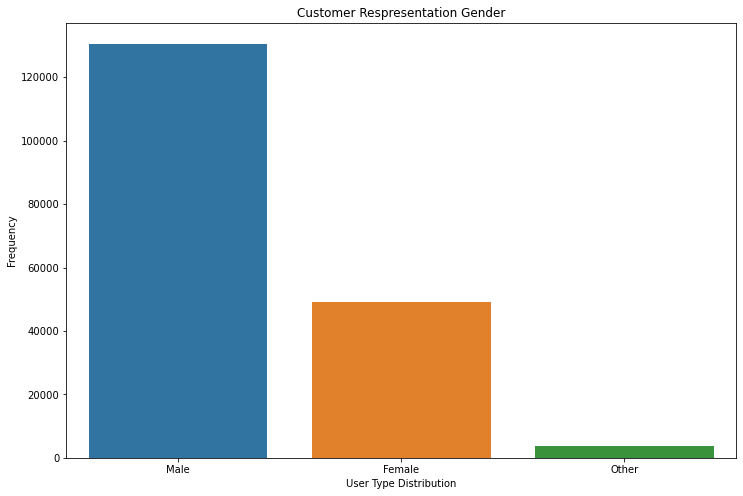

In [119]:
#Distribution of member genders
plt.figure(figsize=[12, 8])

plot = sns.countplot(data=df_go, x='member_gender')

plt.title('Customer Respresentation Gender')
plt.xlabel('User Type Distribution')
plt.ylabel('Frequency')

plt.show()

From the above countplot, we can tell that the majority of users are male, while those who identify as other are the least

### 5. What is the distribution of bike share users on all trips?

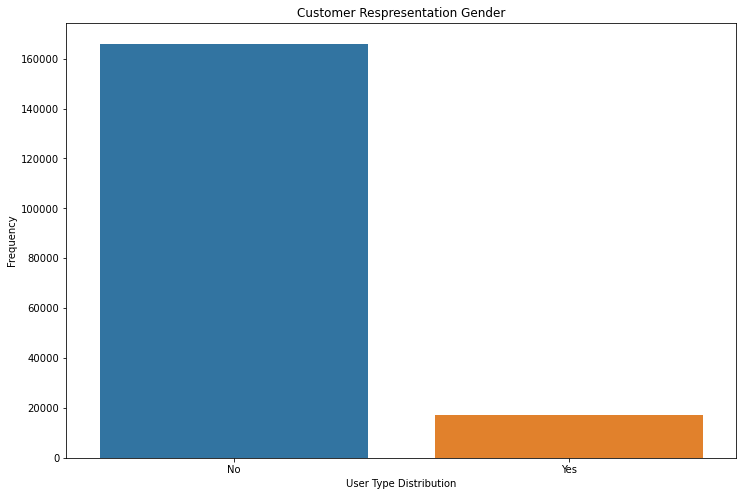

In [120]:
#Distribution of member genders
plt.figure(figsize=[12, 8])

plot = sns.countplot(data=df_go, x='bike_share_for_all_trip')

plt.title('User Distribution by Trip Program')
plt.xlabel('User Type Distribution')
plt.ylabel('Frequency')

plt.show()

From the above countplot, we can see that the vast majority of users are not part of the bike trip program

### 6 What is the distribution of user ride duration in hours

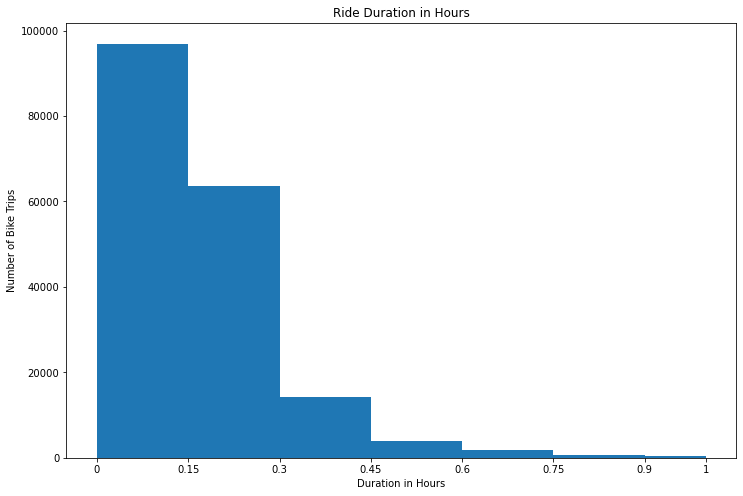

In [132]:
#Duration of rides in hours plot
plt.figure(figsize=[12, 8])
bin_size=[0, 0.15, 0.30, 0.45, 0.60, 0.75, 0.90, 1]
plt.hist(data=df_go, x='duration_hours', bins=bin_size)

plt.title('Ride Duration in Hours')
plt.xlabel('Duration in Hours')
plt.ylabel('Number of Bike Trips')
plt.xticks(ticks, label)
plt.show()

From the plotted distribution, we can see that the majority of users take less than an hour long bike ride

### 7 Are there any outliers in the age of riders?

Text(0.5, 1.0, 'Distribution of users by age ')

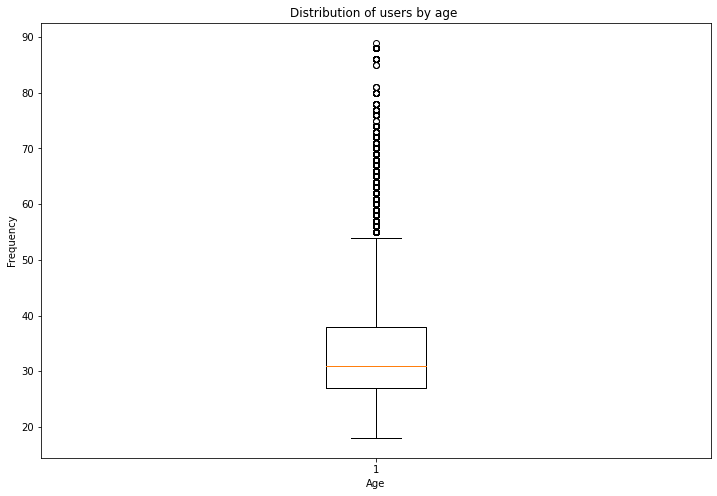

In [136]:
#Outlier distribution plot for ages
plt.figure(figsize=[12, 8])
plt.boxplot(df_go['age'])

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of users by age ')

From the plot, we can tell that there are no users above the age of 90. These ourliers were identified before hand and removed from the dataframe

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

From the main variables, it is clear that most rides were less than 30 minutes long
The Age distribution is skewed to the left with most riders being between the ages of 23 and 40


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Yes, there were ouliers in the age, which i dropped from the dataset




### B. Bivariate Exploration

### 8 What is the average of bike ride lengths in minutes relative to the user types?

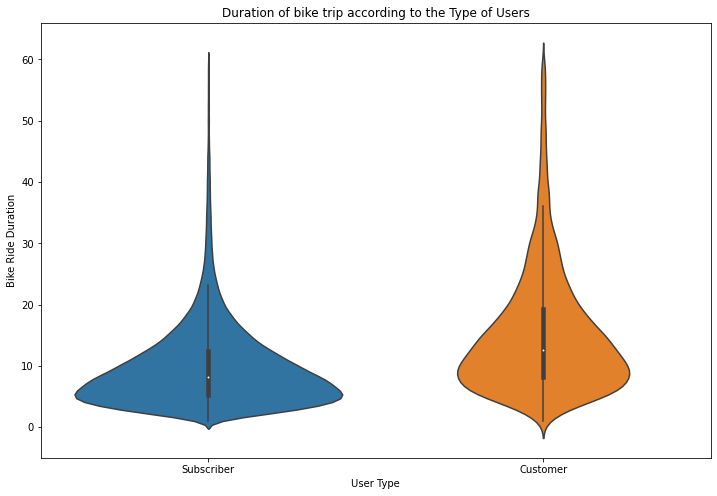

In [135]:
#Duration of rides in minutes plot
plt.figure(figsize=[12, 8])
sns.violinplot(data=df_go.query('duration_minutes <=60'), x='user_type', y='duration_minutes')

plt.title('Duration of bike trip according to the Type of Users')
plt.xlabel('User Type')
plt.ylabel('Bike Ride Duration')

plt.show()

From the violin plot, we can tell that on average in rides that are less than 60 minutes long the customers and subscribers have a similar duration of rides

### 9 What is the distribution of bike ride lengths in hours relative to the user types?

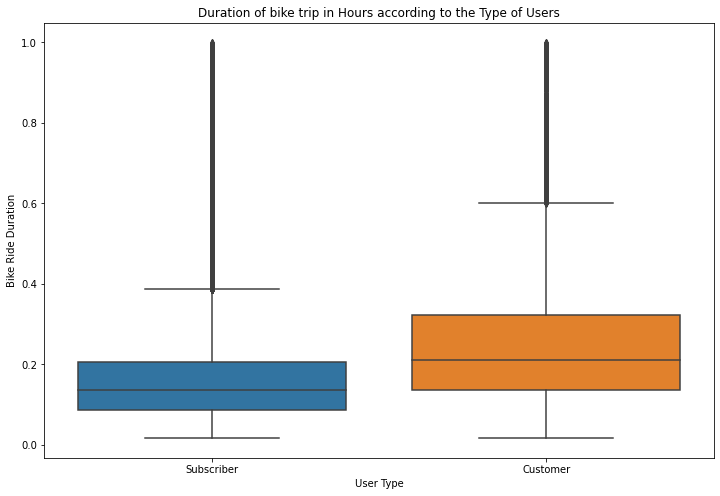

In [146]:
#Duration of rides in minutes plot
plt.figure(figsize=[12, 8])
sns.boxplot(data=df_go.query('duration_hours <=1'), x='user_type', y='duration_hours')

plt.title('Duration of bike trip in Hours according to the Type of Users')
plt.xlabel('User Type')
plt.ylabel('Bike Ride Duration')

plt.show()

From the above boxplot, we can see that on average riders took riders less than an our long but there were more customers taking rides

### 10 What is the average of bike ride lengths in minutes relative to the user ages?

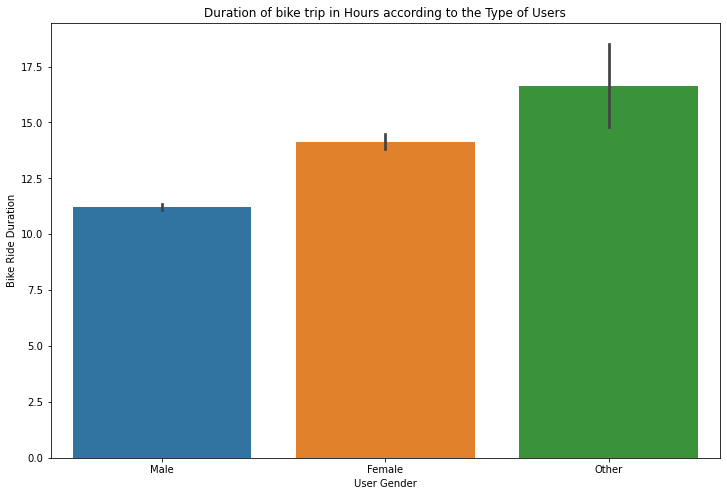

In [141]:
plt.figure(figsize=[12, 8])
sns.barplot(data=df_go, x= 'member_gender', y='duration_minutes')
plt.title('Duration of bike trip in Hours according to the Type of Users')
plt.xlabel('User Gender')
plt.ylabel('Bike Ride Duration')
plt.show()

From the boxplot, we can see that the Other group took longer rides than male or female, with the female gender averaging 14 minutes per ride and the male gender averaging 11 minutes.

### 11 What is the distribution of bike riders ages relative to their gender?

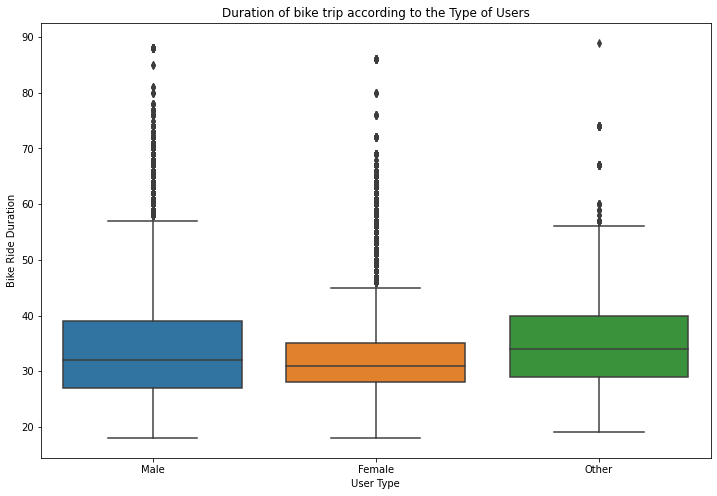

In [145]:
plt.figure(figsize=[12, 8])
sns.boxplot(data=df_go, x='member_gender', y='age')

plt.title('Duration of bike trip according to the Type of Users')
plt.xlabel('User Type')
plt.ylabel('Bike Ride Duration')

plt.show()

From the above boxplot, we can summise that on average users of all genders represented are between the ages of 26 and 40.

### 12 What is the distribution of user types relative to their ages?

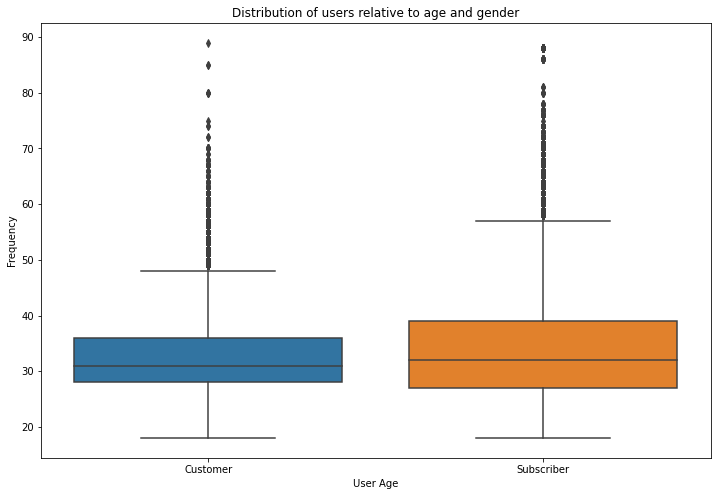

In [153]:
plt.figure(figsize=[12, 8])
sns.boxplot(data=df_go, x= 'user_type', y='age')
plt.title('Distribution of users relative to age and gender')
plt.xlabel('User Age')
plt.ylabel('Frequency')
plt.show()

From the above barplot, we can tell that there are more customers than subscribers

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

we can summise that on average users of all genders represented are between the ages of 26 and 40.
The users classified as customers generally go on longer rides than those who are subscribed

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The distribution of women relative to their ages compared to male genders




## Multivariate Exploration

### 13 What is the ride duration in minutes relative to genders according to User Type?

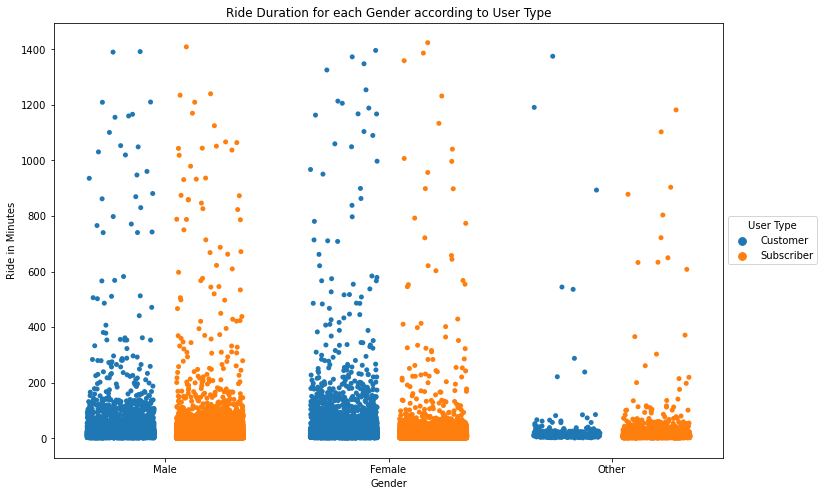

In [161]:
plt.figure(figsize=[12, 8])
sns.stripplot(data=df_go, x='member_gender', y='duration_minutes', hue='user_type', jitter= 0.30, dodge=True)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='User Type')

plt.title('Ride Duration for each Gender according to User Type')
plt.xlabel('Gender')
plt.ylabel('Ride in Minutes')
plt.show()

From the plot, when reviewed Genders, it is clear that customers took longer bike rised than subscribers

### 14 What is the correlation between the various numerical variables in the dataset?

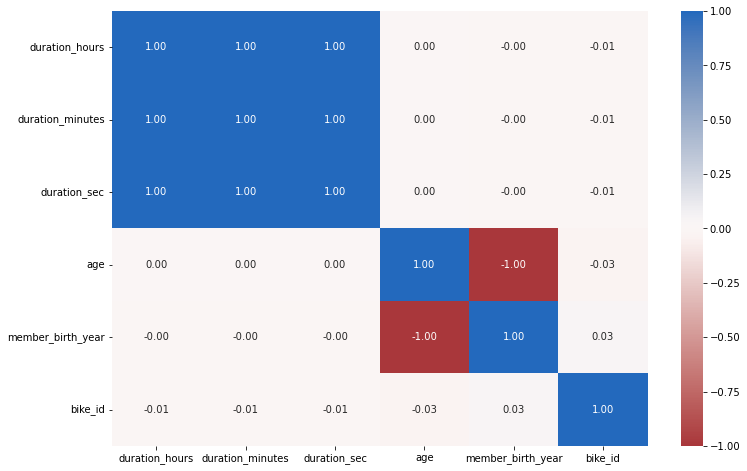

In [169]:
plt.figure(figsize=[12, 8])
data_set= ['duration_hours', 'duration_minutes',"duration_sec", 'age',"member_birth_year", "bike_id"]
sb.heatmap(df_go[data_set].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

The above heatmap shows how various numerical values correlated to each other, with a clear correlation between duration in seconds, minutes and hours

### 15 What is the ride duration in minutes relative to user types according to member genders?

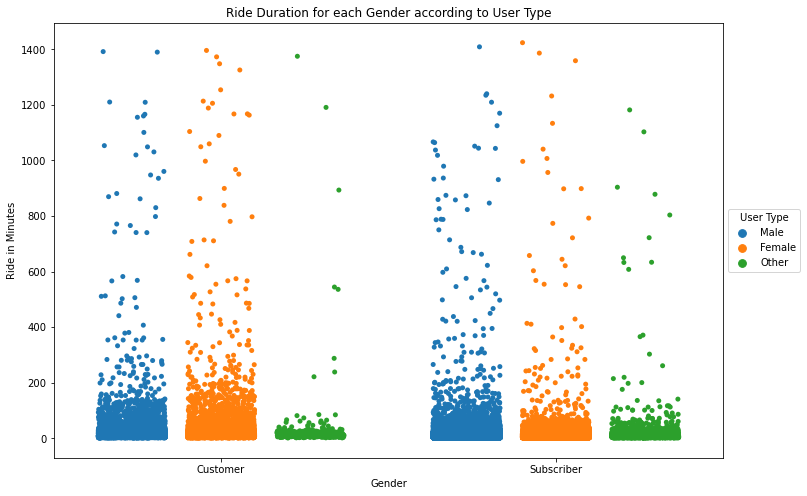

In [167]:
plt.figure(figsize=[12, 8])
sns.stripplot(data=df_go, x='user_type', y='duration_minutes', hue='member_gender', jitter= 0.30, dodge=True)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='User Type')

plt.title('Ride Duration for each Gender according to User Type')
plt.xlabel('Gender')
plt.ylabel('Ride in Minutes')
plt.show()

In [ ]:
From the plot, when reviewed by user types, it is clear that female customers took longer rides than female subscribers

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The correlation between start ID and time or duration of rides os quite weak.


### Were there any interesting or surprising interactions between features?

There is a direct correlation between duration in seconds, minutes and hours.

## Conclusions
The data in use presented some challenges, with a major outlier in the Age data which I proceeded to remove. The data itself was cleaned and 15 plots and conclusions made as a result.



From the data, we can conclude the following:

1. Most of the users are subscriers
2. Most of the riders are of the male gender
3. when reviewed by user types, it is clear that female customers took longer rides than female subscribers
4. when reviewed Genders, it is clear that customers took longer bike rised than subscribers
5. we can summise that on average users of all genders represented are between the ages of 26 and 40.

